**Linear Regression**

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv('/content/drive/MyDrive/Handson/Housing.csv')

In [42]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [43]:
df.shape

(545, 13)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [45]:
df.duplicated().sum()

np.int64(0)

In [46]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [47]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

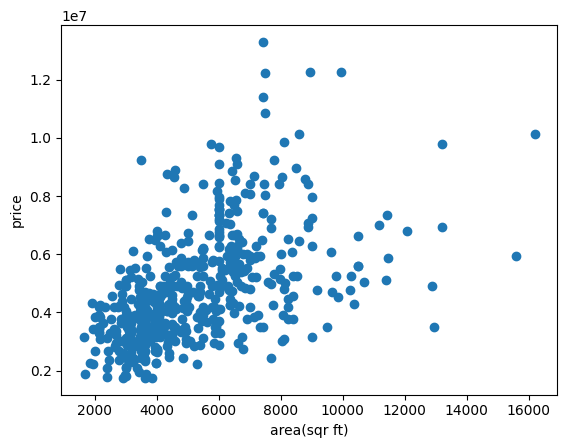

In [48]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price')
plt.scatter(df.area,df.price)

In [49]:
y=df['price']

In [50]:
x=df.drop(columns=['price'])

In [51]:
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [52]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [53]:
b_col=["mainroad", "guestroom", "basement","hotwaterheating", "airconditioning", "prefarea"]

In [54]:
for col in b_col:
    x[col] = x[col].map({"yes": 1, "no": 0})

In [55]:
x = pd.get_dummies(x, columns=["furnishingstatus"])

In [56]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred = model.predict(X_test)

In [60]:
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("MSE :", mse)
print("R²  :", r2)

MSE : 1754318687330.6638
R²  : 0.6529242642153184


In [62]:
sample = X_test.iloc[0:1]
pred_price = model.predict(sample)[0]
print("\nActual price :", y_test.iloc[0])
print("Predicted price:", pred_price)


Actual price : 4060000
Predicted price: 5164653.9003396705


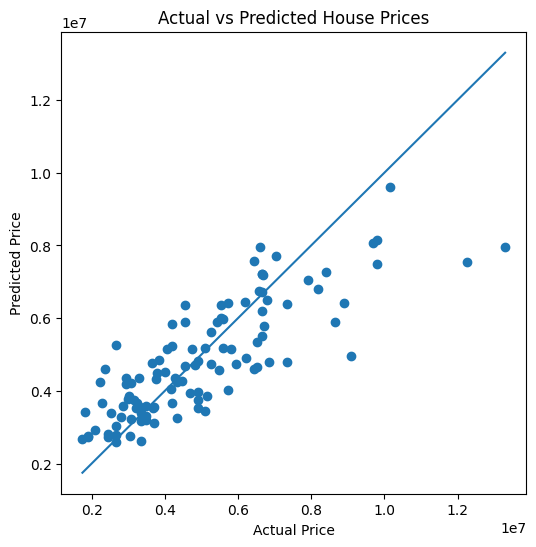

In [67]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

**Logistic regression**

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df=pd.read_csv('/content/drive/MyDrive/Handson/Housing.csv')

In [75]:
b_col = ["mainroad", "guestroom", "basement","hotwaterheating", "airconditioning", "prefarea"]

In [77]:
for col in b_col:
    df[col] = df[col].map({"yes": 1, "no": 0})

In [78]:
df = pd.get_dummies(df, columns=["furnishingstatus"], drop_first=True)

In [79]:
avg_price = df["price"].mean()
df["expensive"] = (df["price"] > avg_price).astype(int)

In [81]:
X = df.drop(columns=["price", "expensive"])
y = df["expensive"]

In [82]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [84]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [85]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [88]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.8165137614678899

Confusion Matrix:
 [[51  6]
 [14 38]]


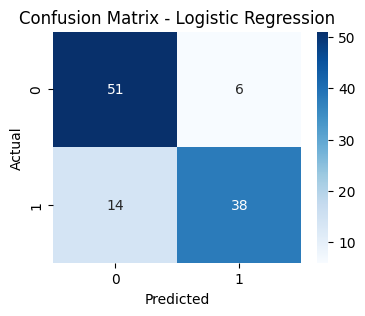

In [87]:
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()